In [63]:
from sklearn.datasets import load_diabetes

# 데이터 로딩
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

In [64]:
import numpy as np

# 읽어온 데이터를 np.array 타입으로 변환
df_X = np.array(df_X)
df_y = np.array(df_y)

In [65]:
from sklearn.model_selection import train_test_split

# 데이터를 train set과 test set으로 구분
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=250110)

In [66]:
# 데이터의 차원 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [67]:
# 모델의 파라미터 초기화
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * W[i]
    predictions += b
    return predictions        

In [68]:
# Loss 계산을 위한 MSE 계산 함수
def MSE(truth, predictions):
    mse = ((truth - predictions) ** 2).mean()
    return mse

In [69]:
# Loss 함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(y, predictions)
    return L

In [70]:
# 학습을 위한 gradient 계산
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [84]:
# Learning Rate
learning_rate = 0.5

In [85]:
# 학습; gradient 계산 -> 가중치 업데이트 -> Loss 계산 과정 반복
losses = []
for i in range(1, 3001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    if i % 100 == 0:
        print(f'Iteration {i}: Loss {L}')


Iteration 100: Loss 3965.01744551989
Iteration 200: Loss 3471.933339638802
Iteration 300: Loss 3263.894141395569
Iteration 400: Loss 3150.229936041064
Iteration 500: Loss 3081.4957932387306
Iteration 600: Loss 3038.354977536607
Iteration 700: Loss 3010.7688202210543
Iteration 800: Loss 2992.874269671316
Iteration 900: Loss 2981.101610529832
Iteration 1000: Loss 2973.2388839661103
Iteration 1100: Loss 2967.900347195894
Iteration 1200: Loss 2964.2097154644775
Iteration 1300: Loss 2961.6077643196986
Iteration 1400: Loss 2959.7342145897173
Iteration 1500: Loss 2958.3546232206695
Iteration 1600: Loss 2957.314793922206
Iteration 1700: Loss 2956.5121433628906
Iteration 1800: Loss 2955.877586749701
Iteration 1900: Loss 2955.3639931725206
Iteration 2000: Loss 2954.938770830119
Iteration 2100: Loss 2954.5790654064785
Iteration 2200: Loss 2954.2686230228023
Iteration 2300: Loss 2953.995720992809
Iteration 2400: Loss 2953.7517886992578
Iteration 2500: Loss 2953.5304781066047
Iteration 2600: Loss 2

In [86]:
# Test set에 대한 예측 수행하고, mse 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

2653.5773622837437

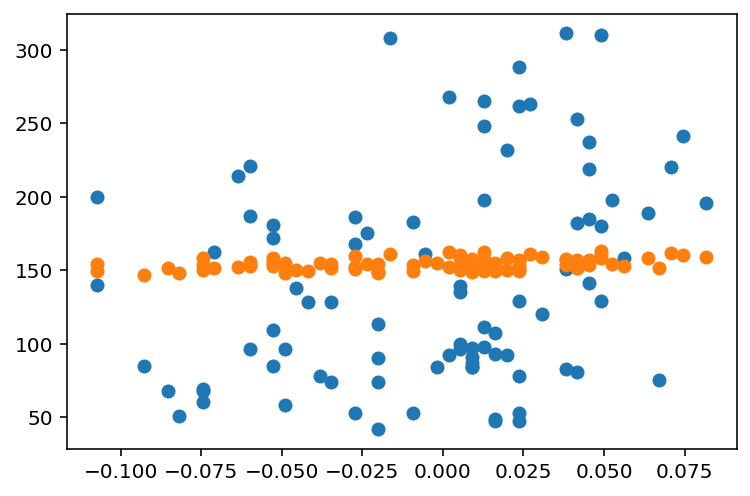

In [80]:
# 그래프로 표현
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [81]:
# 가중치 값 확인
W

array([  6.75311459,   1.0294806 ,  22.32819125,  16.13981158,
         7.14851513,   5.6248048 , -13.77343133,  16.31128847,
        21.11712354,  14.44320065])

In [82]:
b

154.54494041317645

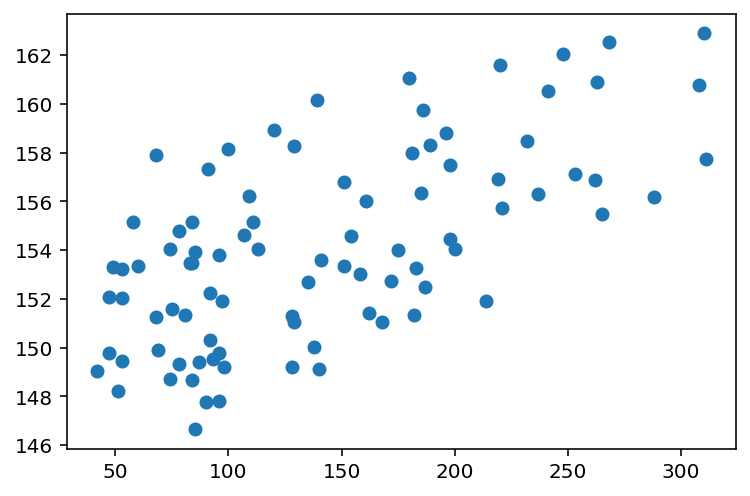

In [83]:
# truth와 예측값 간의 상관관계 시각화
plt.scatter(y_test, prediction)
plt.show()